# 0.Объявление функции и отрисовка её графика

$f(x, y) = x^2 - 2xy + y^2 +4x - 4y +5$

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

!pip install numdifftools
from numdifftools import Gradient


def f(x):
    return x[0]**2 - 2*x[0]*x[1] + x[1]**2 + 4*x[0] - 4*x[1] + 5


def graphic(f):
    ax = plt.figure().add_subplot(projection='3d')
    Z = np.zeros_like(X)
    for i in range(len(X)):
        for j in range(len(Y)):
            Z[i, j] = f([X[i, j], Y[i, j]])
    ax.plot_surface(X, Y, Z)
    # ax.set_zlim([None, 6])


lower_bound_x = -20
upper_bound_x = 20
lower_bound_y = -10
upper_bound_y = 20


def generate_random_point():
  x_0 = np.random.uniform(lower_bound_x, upper_bound_x)
  y_0 = np.random.uniform(lower_bound_y, upper_bound_y)
  return [x_0, y_0]


accuracy = 1000
tx = np.linspace(lower_bound_x, upper_bound_x, accuracy)
ty = np.linspace(lower_bound_y, upper_bound_y, accuracy)
X, Y = np.meshgrid(tx, ty)
plt.rcParams["figure.figsize"] = (10, 10)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 KB 7.8 MB/s eta 0:00:00


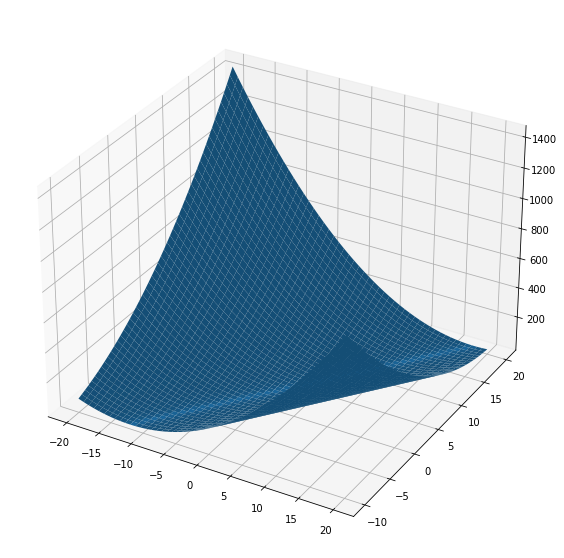

In [ ]:
graphic(f)

# 1.Градиентный спуск с постоянным шагом


In [ ]:
gradient_eps = 1e-4

def const_step(f, x, epoch, paint_contour, learning_rate=0.09):
    grad = Gradient(f)
    n = len(x)
    points = np.zeros((epoch + 1, n))
    points[0] = x
    count_of_iters = 0
    count_of_f = 0
    count_of_grad = 0
    for i in range(1, epoch + 1):
      gr = grad(x)
      if np.linalg.norm(gr) < gradient_eps:
        count_of_iters = i
        count_of_grad = i
        break
      x = x + learning_rate*(-gr)
      points[i] = x
    if paint_contour:
      print(x)
      points = points[:count_of_iters]
      Z = np.zeros(X.shape)
      for i in range(len(Z)):
        for j in range(len(Z[0])):
          Z[i][j] = f([X[i][j], Y[i][j]])
      plt.contour(X, Y, Z, levels=sorted(list(set([f(p) for p in points]))))
      plt.plot(points[:, 0], points[:, 1], '-r8')
    return count_of_iters, count_of_f, count_of_grad


Запустили метод градиентного спуска в случайной точке

[6.79809038 8.79812117]


(30, 0, 30)

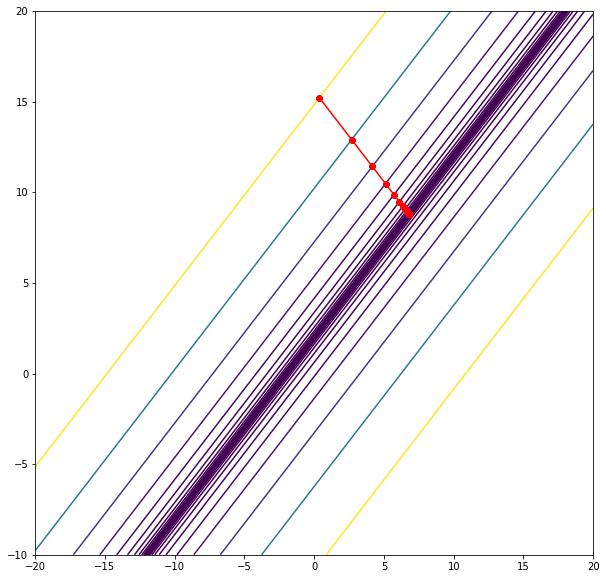

In [ ]:
x = generate_random_point()
epoch = 1000
const_step(f, x, epoch, True)



# 2.Метод одномерного поиска (метод дихотомии)

In [ ]:
eps = 1e-4


def ternary_search(f, x, gr, left=0, right = 10):
    count_of_f = 0
    while right - left > eps :
        count_of_f += 2
        a = (left*2+right) / 3
        b  = (right*2 + left) / 3
        if f(x - a*gr) < f(x - b*gr):
            right = b
        else:
            left = a
    return (left+right)/2, count_of_f


def linear_search(f, x, epoch, paint_contour, left_min = 0, right_max = 10):
    grad = Gradient(f)
    points = np.zeros((epoch + 1, 2))
    points[0] = x
    count_of_iters = 0
    count_of_f = 0
    count_of_grad = 0
    for i in range(1, epoch + 1):
      gr = grad(x)
      if np.linalg.norm(gr) < gradient_eps:
        count_of_iters = i
        count_of_grad = i
        break
      t, c_i = ternary_search(f, x, gr, left_min, right_max)
      count_of_f += c_i
      x = x + t*(-gr)
      points[i] = x
    if paint_contour:
      print(x)
      points = points[:count_of_iters]
      Z = np.zeros(X.shape)
      for i in range(len(Z)):
        for j in range(len(Z[0])):
          Z[i][j] = f([X[i][j], Y[i][j]])
      plt.contour(X, Y, Z, levels=sorted(list(set([f(p) for p in points]))))
      plt.plot(points[:, 0], points[:, 1], '-r8')
    return count_of_iters, count_of_f, count_of_grad


Запустили метод одномерного поиска в случайной точке

[6.49248097 8.49248097]


(3, 116, 3)

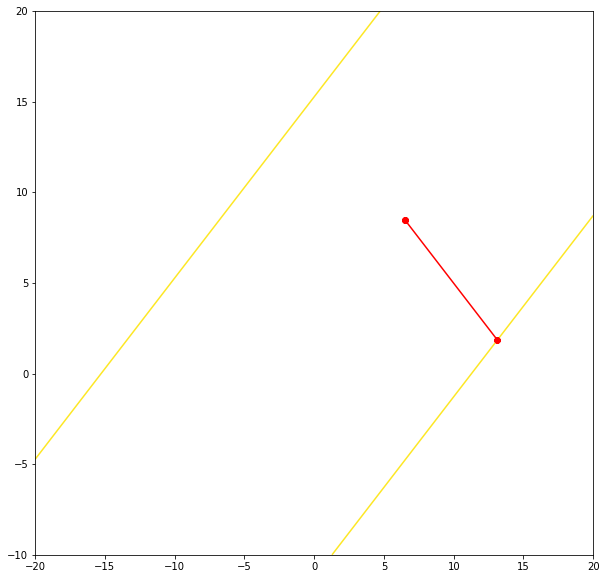

In [ ]:
x = generate_random_point()
linear_search(f, x, epoch, True)

# 3.Работа метода градиентного спуска для различных функций

Взяли $f(x, y) = x^2−2xy+y^2+4x−4y+5$ и $g(x, y) = 11(x - 1.25)^2 + (y - 6.9)^2$

In [ ]:
def f(x):
    return x[0]**2 - 2*x[0]*x[1] + x[1]**2 + 4*x[0] - 4*x[1] + 5


def g(x):
    return 11*(x[0] - 1.25)**2 + (x[1] - 6.9)**2


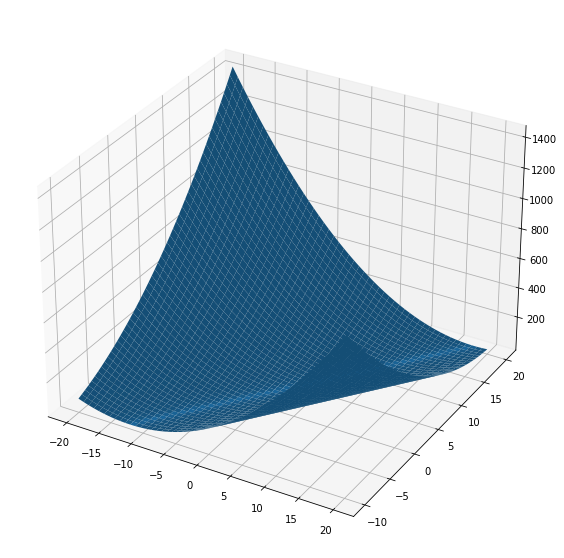

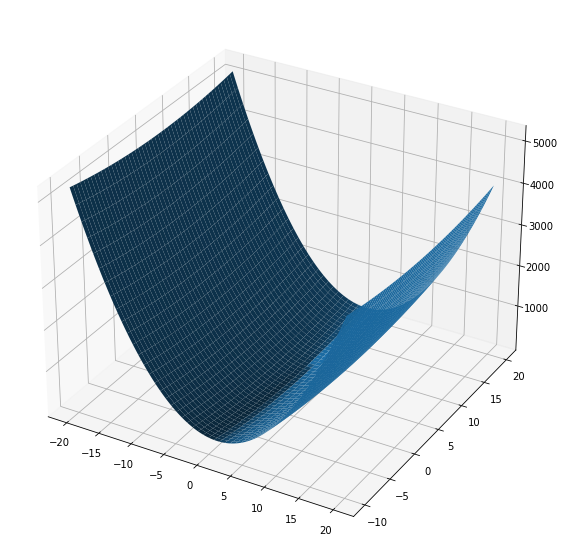

In [ ]:
graphic(f)
graphic(g)


Запустили метод градиентного спуска с постоянным шагом в случайной точке для функций *f* и *g*

[ 9.56259958 11.56257034]


(30, 0, 30)

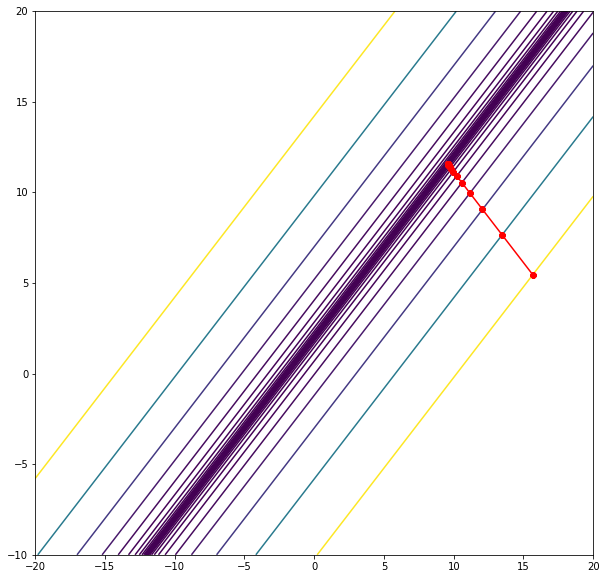

In [ ]:
x = generate_random_point()
const_step(f, x, epoch, True)


[1.25000454 6.9       ]


(738, 0, 738)

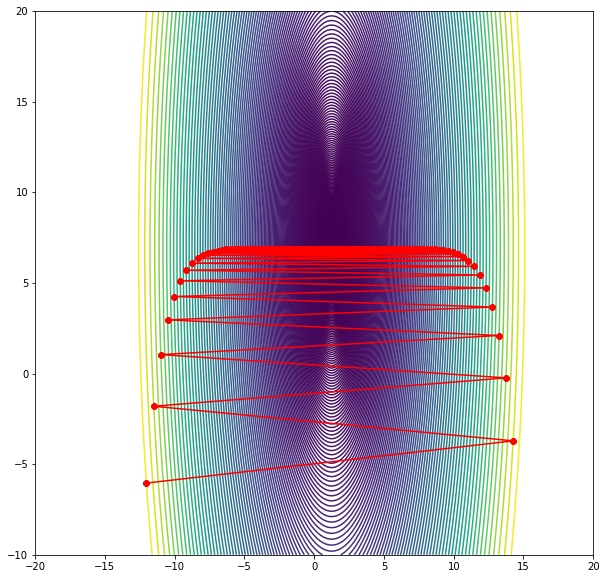

In [ ]:
x = generate_random_point()
const_step(g, x, epoch, True)


# 4.Исследование сходимости градиентного спуска

## a. Сходимость градиентного спуска для различных функций

Как видим из п.3 чем более полого ведёт себя функция в районе минимума, тем больше требуется итераций для нахождения минимума

## b.Эффективность градиентного спуска (среднее количество итераций)



In [ ]:
summary_iterations_f_lin = 0
summary_iterations_g_lin = 0
summary_iterations_f_cnst = 0
summary_iterations_g_cnst = 0
count = 100
for i in range(count):
  iterations, count_f, count_grad = linear_search(f, generate_random_point(), epoch, False)
  summary_iterations_f_lin += iterations
  iterations, count_f, count_grad = const_step(f, generate_random_point(), epoch, False)
  summary_iterations_f_cnst += iterations
  iterations, count_f, count_grad = linear_search(g, generate_random_point(), epoch, False)
  summary_iterations_g_lin += iterations
  iterations, count_f, count_grad = const_step(g, generate_random_point(), epoch, False)
  summary_iterations_g_cnst += iterations
print(summary_iterations_f_cnst/count, summary_iterations_g_cnst/count)
print(summary_iterations_f_lin/count, summary_iterations_g_lin/count)

29.27 706.68
2.85 15.51


Метод | f(x) | g(x)
------|------|-----
постоянный шаг | 29.27 | 706.68
одномерный поиск | 2.85 | 15.51

## c.Работа градиентного спуска в зависимости от выбора начальной точки



### Для функции *f*

$f(x, y) = x^2−2xy+y^2+4x−4y+5$

#### Начальная точка x = (0, 0)

[-0.99998573  0.99998573]


26

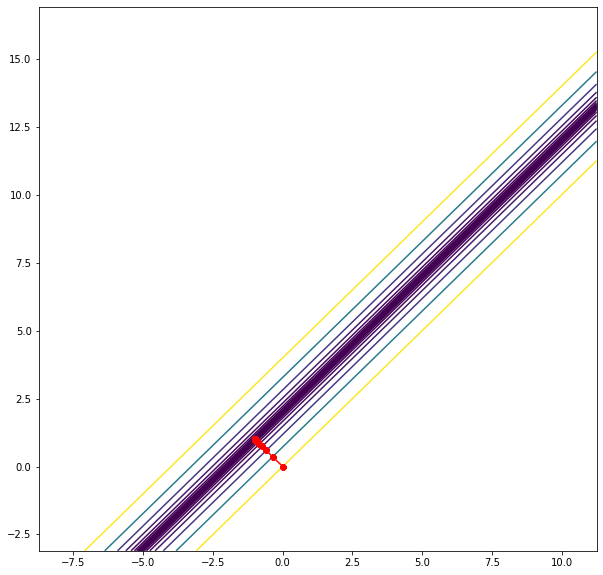

In [ ]:
const_step(f, [0, 0], epoch, True)


[-1.00001067  1.00001067]


2

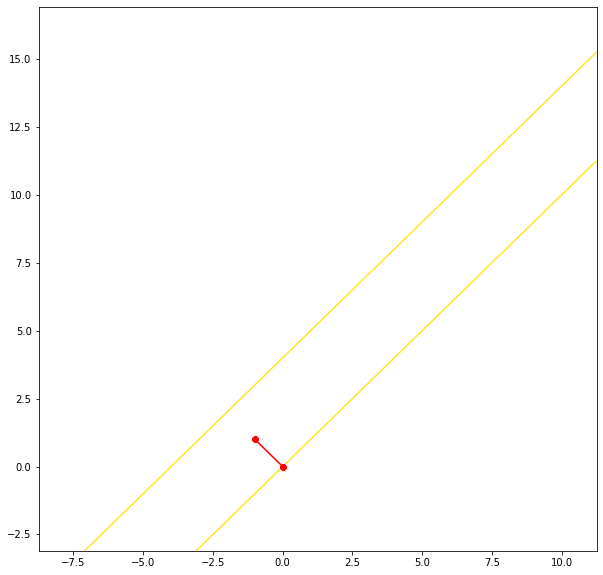

In [ ]:
linear_search(f, [0, 0], epoch, True)


#### Начальная точка x = (10, 0)

[4.00001437 5.99998563]


30

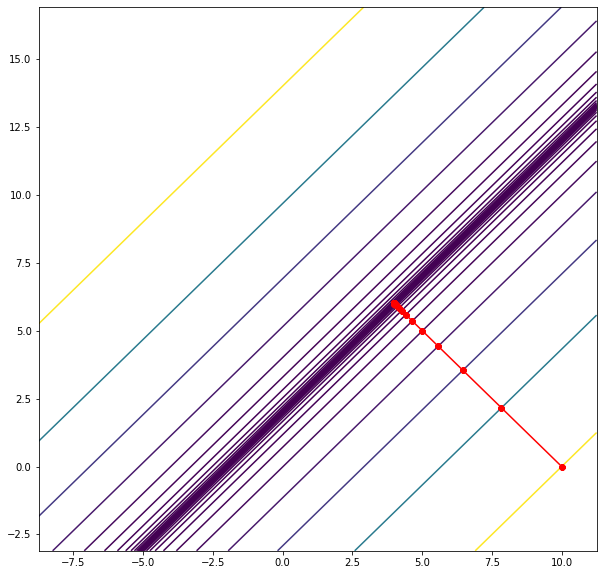

In [ ]:
const_step(f, [10, 0], epoch, True)


[4.00000003 5.99999997]


3

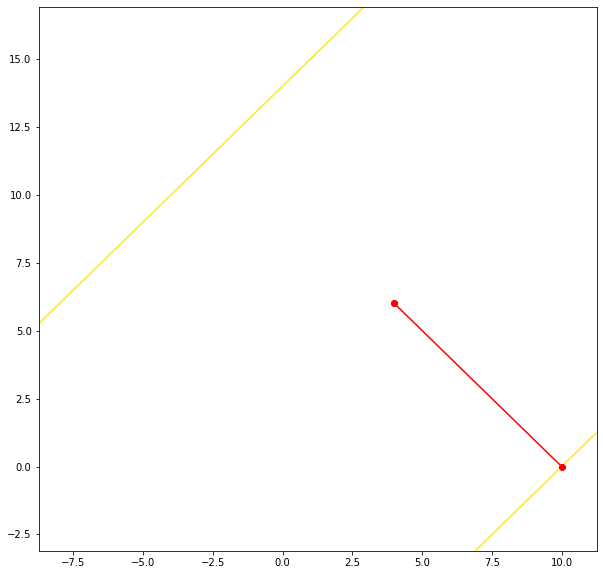

In [ ]:
linear_search(f, [10, 0], epoch, True)


#### Начальная точка x = (-7.5, 15)

[2.74998429 4.75001571]


31

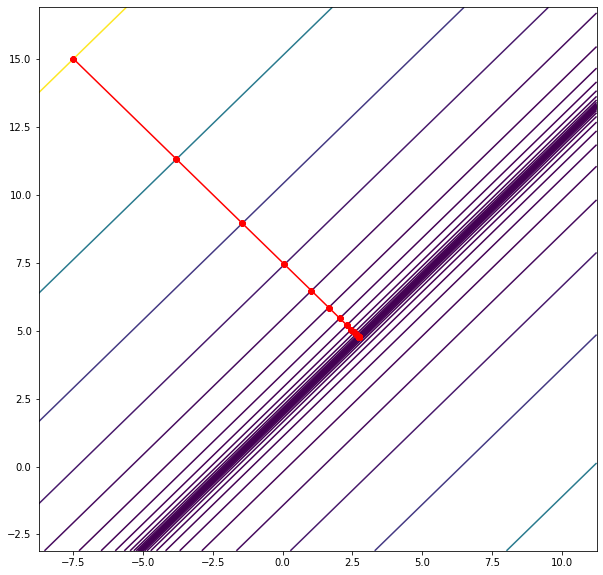

In [ ]:
const_step(f, [-7.5, 15], epoch, True)


[2.74999997 4.75000003]


3

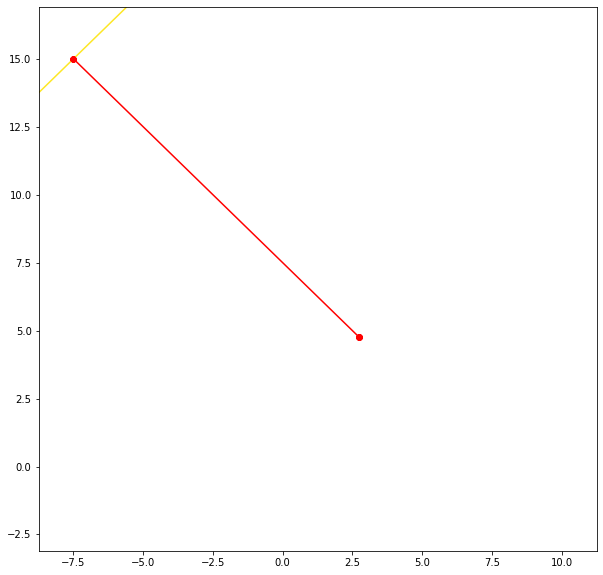

In [ ]:
linear_search(f, [-7.5, 15], epoch, True)


#### Начальная точка х = (-1.5, 0)

[-1.74998639  0.24998639]


23

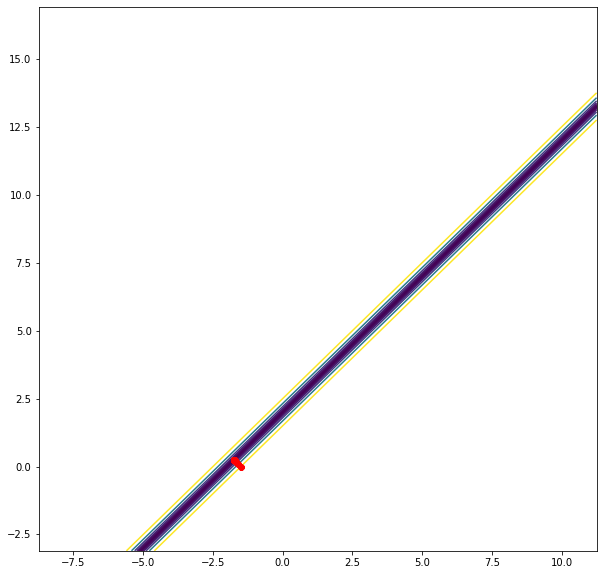

In [ ]:
const_step(f, [-1.5, 0], epoch, True)


[-1.75000267  0.25000267]


2

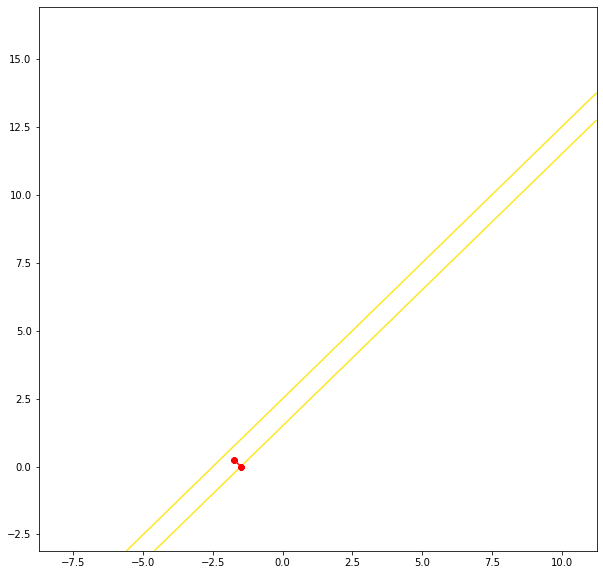

In [ ]:
linear_search(f, [-1.5, 0], epoch, True)


### Для функции *g*

$g(x, y) = 11(x - 1.25)^2 + (y - 6.9)^2$

#### Начальная точка х = (0, 0)

[1.24999546 6.9       ]


621

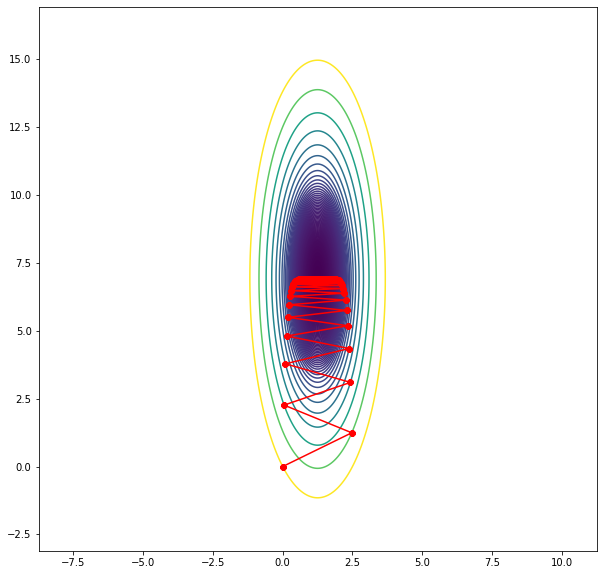

In [ ]:
const_step(g, [0, 0], epoch, True)


[1.25000173 6.89996213]


48

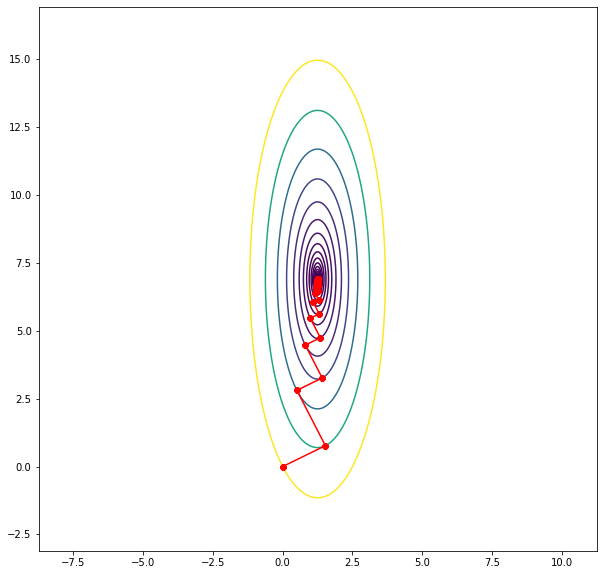

In [ ]:
linear_search(g, [0, 0], epoch, True)


#### Начальная точка х = (1.25, 15)

[1.25       6.90004478]


62

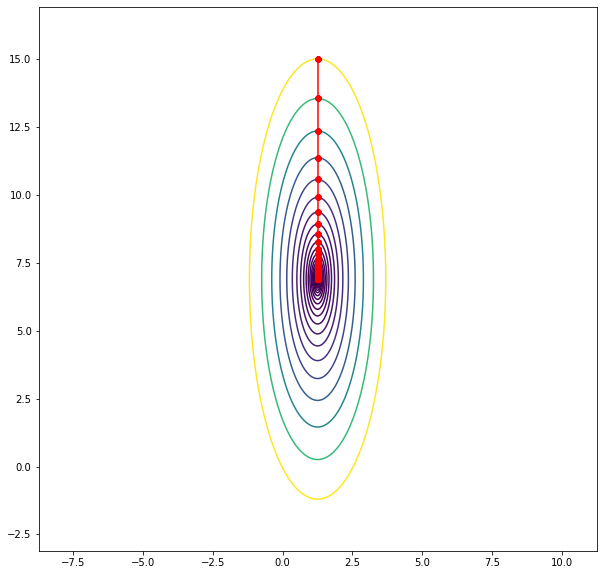

In [ ]:
const_step(g, [1.25, 15], epoch, True)


[1.25      6.8999671]


2

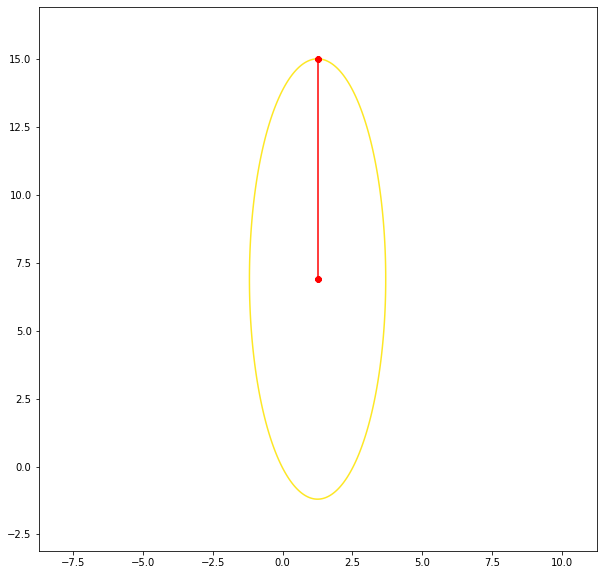

In [ ]:
linear_search(g, [1.25, 15], epoch, True)


#### Начальная точка х = (10, 6.9)

[1.24999552 6.9       ]


718

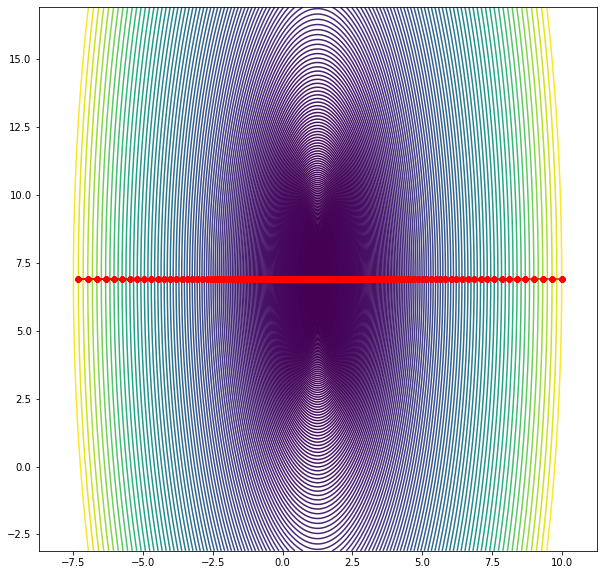

In [ ]:
const_step(g, [10, 6.9], epoch, True)


[1.25000111 6.9       ]


3

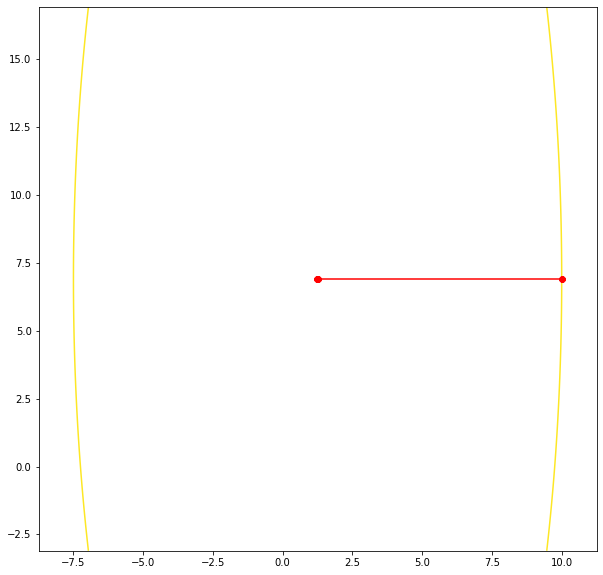

In [ ]:
linear_search(g, [10, 6.9], epoch, True)


#### Начальная точка х = (10, 15)

[1.24999552 6.9       ]


718

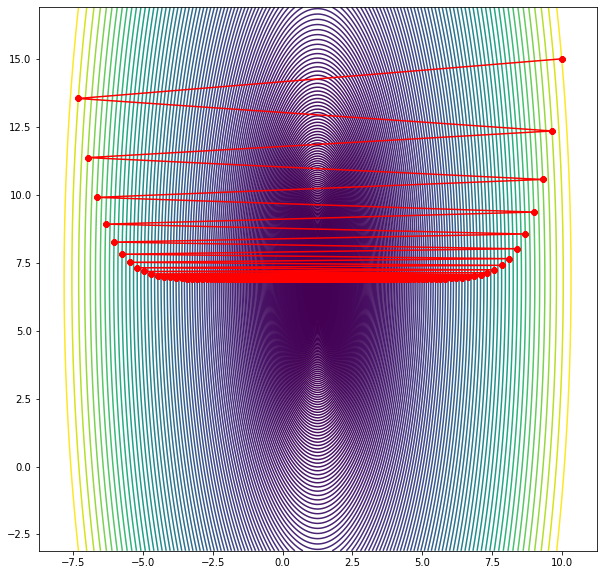

In [ ]:
const_step(g, [10, 15], epoch, True)


[1.24999964 6.9000492 ]


10

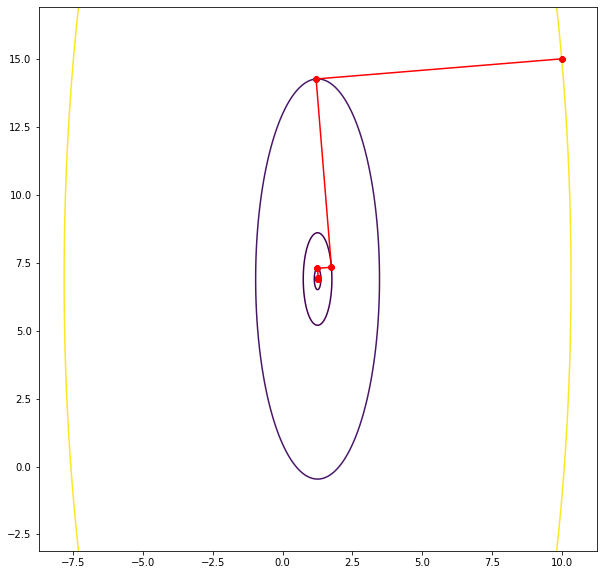

In [ ]:
linear_search(g, [10, 15], epoch, True)


## d.Влияние нормализации на сходимость градиентного спуска

Для этого будем растягивать нашу функцию $g(x, y) = 11(x - 1.25)^2 + (y - 6.9)^2$ по оси Ох и Оу, обозначим $g_1(x, y) = α(x-1.25)^2 + β(y-6.9)^2$

### $α = 0.1, β = 1$

In [ ]:
alpha = 0.1
beta = 1


def g(x):
    return alpha*(x[0] - 1.25)**2 + beta*(x[1] - 6.9)**2

[1.25049614 6.9       ]


487

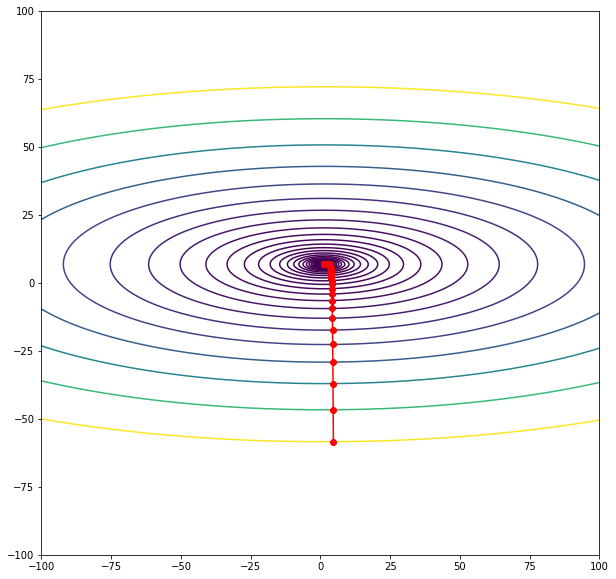

In [ ]:
x = generate_random_point()
const_step(g, x, epoch, True)


[1.25003772 6.90004353]


11

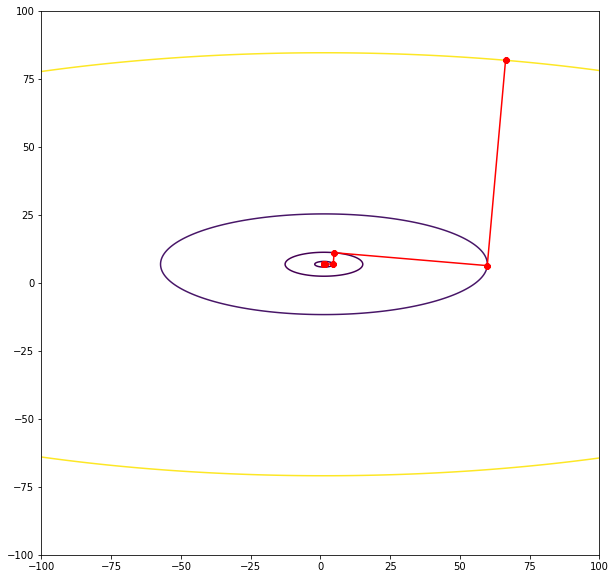

In [ ]:
x = generate_random_point()
linear_search(g, x, epoch, True)


### $α = 1, β = 10$

In [ ]:
alpha = 1
beta = 10


def g(x):
    return alpha*(x[0] - 1.25)**2 + beta*(x[1] - 6.9)**2

[1.2500045 6.9      ]


(685, 0, 685)

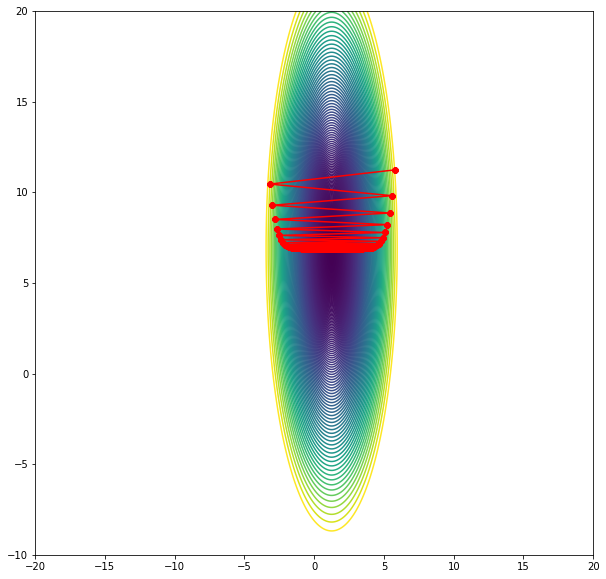

In [ ]:
x = generate_random_point()
const_step(g, x, epoch, True)


[1.24999997 6.90000418]


(12, 638, 12)

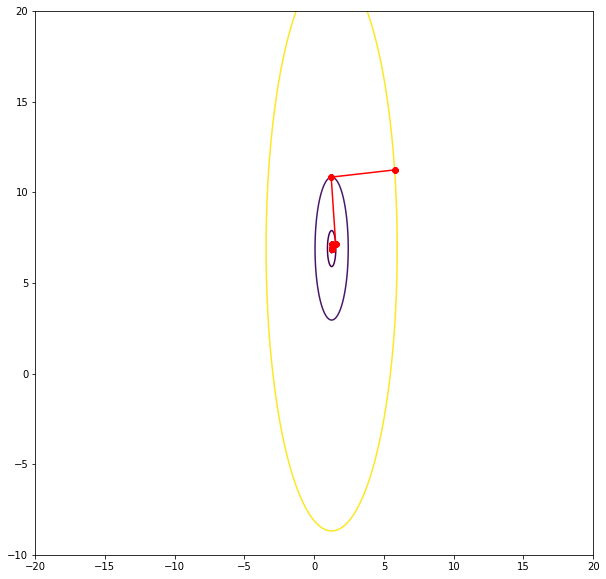

In [ ]:
linear_search(g, x, epoch, True)

### $α = 0.01, β = 10$

In [ ]:
alpha = 0.01
beta = 10


def g(x):
    return 11*alpha*(x[0] - 1.25)**2 + beta*(x[1] - 6.9)**2

[1.25045064 6.9       ]


421

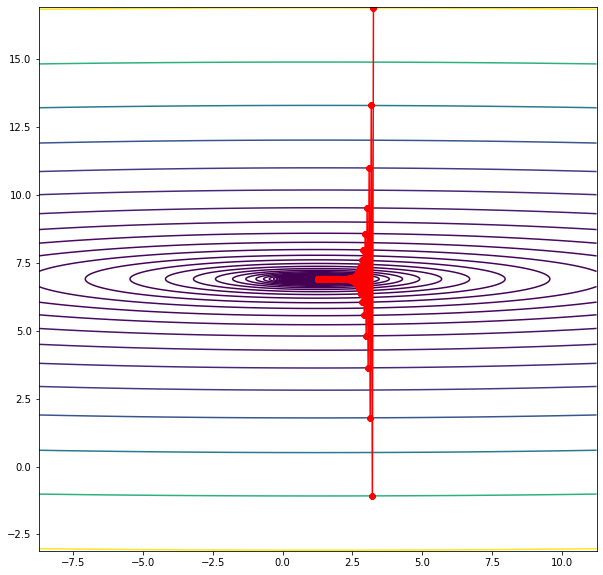

In [ ]:
x = generate_random_point()
const_step(g, x, epoch, True)

### $α = 10, β = 10$

In [ ]:
alpha = 10
beta = 10


def g(x):
    return alpha*(x[0] - 1.25)**2 + beta*(x[1] - 6.9)**2

[1.24999804 6.89999604]


65

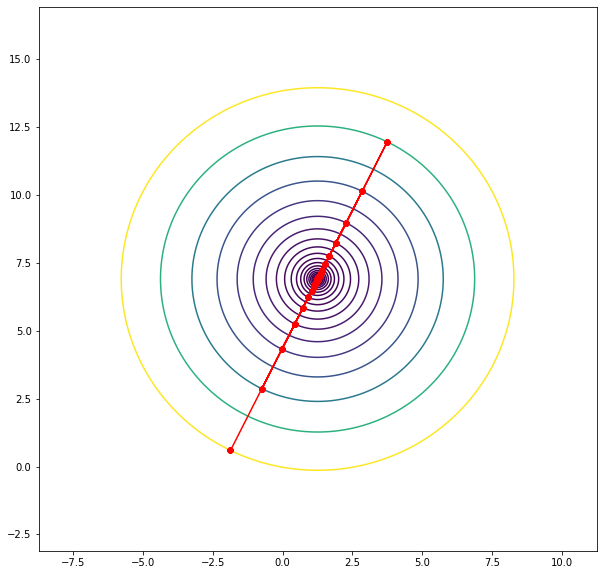

In [ ]:
x = generate_random_point()
const_step(g, x, epoch, True)


### $α = 0,01, β = 0.1$

In [ ]:
alpha = 0.01
beta = 0.1


def g(x):
    return alpha*(x[0] - 1.25)**2 + beta*(x[1] - 6.9)**2

[1.25499928 6.9       ]


3668

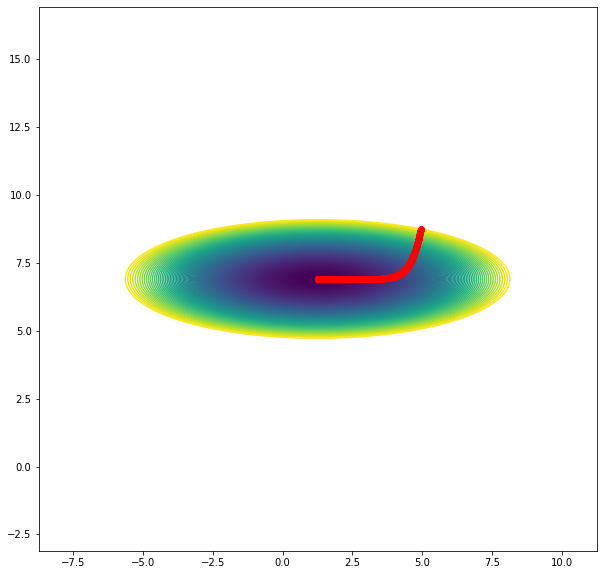

In [ ]:
x = generate_random_point()
const_step(g, x, 10000, True)


### $α = 0,001, β = 0.01$

In [ ]:
alpha = 0.001
beta = 0.01


def g(x):
    return alpha*(x[0] - 1.25)**2 + beta*(x[1] - 6.9)**2

[2.36626308 6.89999989]


10000

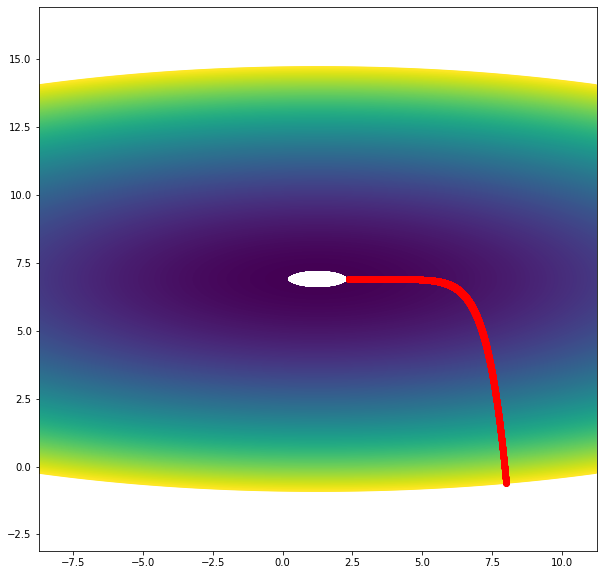

In [ ]:
x = generate_random_point()
const_step(g, x, 10000, True)


# 5.Генератор случайных квадратичных функций от n переменных с числом обусловленности k

In [ ]:
def generate_quadratic_function(n, k):
    Q, R = np.linalg.qr(np.random.rand(n, n))
    A = np.diag(np.linspace(k, 1, n))
    A = np.dot(Q.T, np.dot(A, Q))
    b = np.random.rand(n)
    c = np.random.rand()
    return lambda x: np.dot(x, np.dot(A, x)) + np.dot(b, x) + c



# Доп задание. Одномерный поиск с учетом условий Вольфе.

## Реализация линейного поиска с условиями Вольфе

In [ ]:
eps = 1e-4


def ternary_search_wolfe(f, grad_f, x, gr, left=0, right=10, c1=1e-4, c2=1e-2):
    count_of_f = 0
    count_of_grad = 0
    while right - left > eps :
        a = (left*2+right) / 3
        b  = (right*2 + left) / 3
        t = (left + right) / 2
        f_x = f(x)
        grad_f_x = grad_f(x)
        count_of_f += 2
        count_of_grad += 2
        if f(x - t*gr) <= f_x - c1 * t * grad_f_x @ gr:
          if abs(grad_f(x - t*gr) @ gr) <= c2 * abs(grad_f_x @ gr):
            return t, count_of_f, count_of_grad
        count_of_f += 2
        if f(x - a*gr) < f(x - b*gr):
            right = b
        else:
            left = a
    return t, count_of_f, count_of_grad


def linear_search_wolfe(f, x, epoch, paint_contour, left_min = 0, right_max = 10, c1=1e-4, c2=1e-2):
    grad = Gradient(f)
    points = np.zeros((epoch, 2))
    points[0] = x
    count_of_iters = 0
    count_of_f = 0
    count_of_grad = 0
    for i in range(1, epoch):
      gr = grad(x)
      if np.linalg.norm(gr) < gradient_eps:
        count_of_iters = i
        count_of_grad += i
        break
      t, cf_i, cg_i = ternary_search_wolfe(f, grad, x, gr, left_min, right_max, c1, c2)
      count_of_f += cf_i
      count_of_grad += cg_i
      x = x + t*(-gr)
      points[i] = x
    if paint_contour:
      print(x)
      points = points[:count_of_iters]
      Z = np.zeros(X.shape)
      for i in range(len(Z)):
        for j in range(len(Z[0])):
          Z[i][j] = f([X[i][j], Y[i][j]])
      plt.contour(X, Y, Z, levels=sorted(list(set([f(p) for p in points]))))
      plt.plot(points[:, 0], points[:, 1], '-r8')
    return count_of_iters, count_of_f, count_of_grad


## Пример работы

### Генерация функции и выбор точки

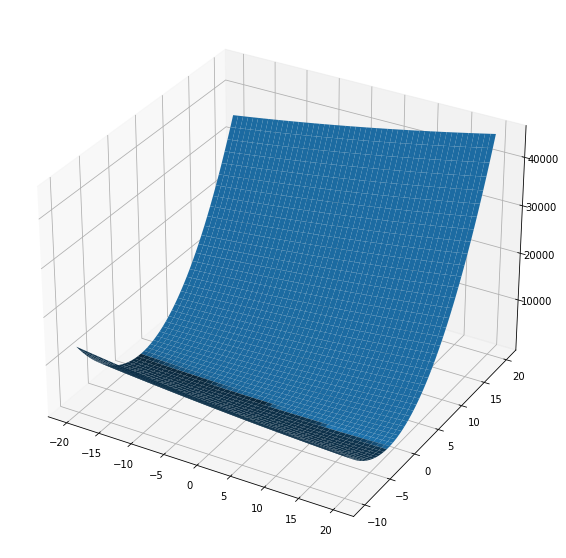

In [ ]:
function = generate_quadratic_function(2, 100)
x = [5, 5]
graphic(function)

### Обычный линейный поиск без условий Вольфе

[-0.42965364  0.02440673]


(222, 12818, 222)

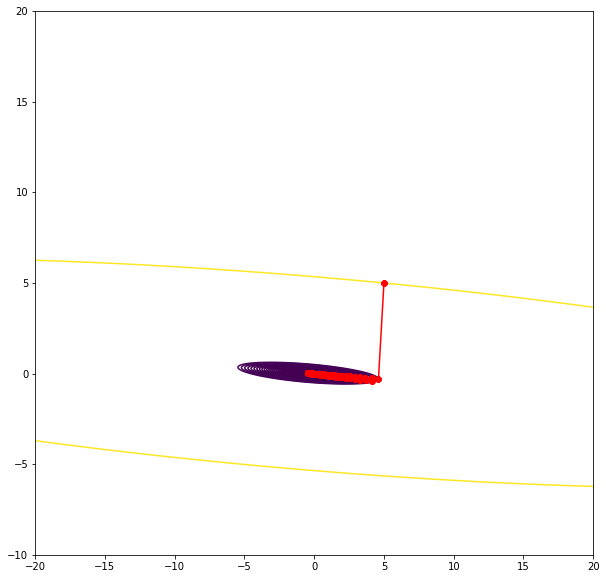

In [ ]:
linear_search(function, x, epoch, True)

### Линейный поиск с условиями Вольфе. c1 = c2 = 1e-8

[-0.42966425  0.02440724]


(10, 1044, 532)

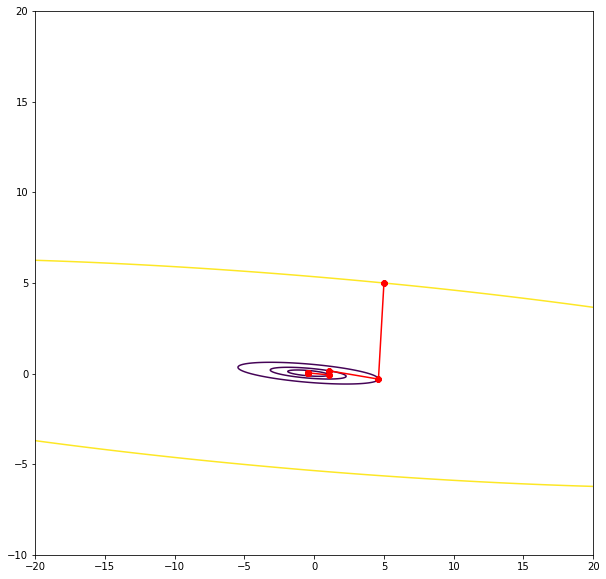

In [ ]:
linear_search_wolfe(function, x, epoch, True,c1=1e-8, c2=1e-8)

### Линейный поиск с условиями Вольфе. c1 = c2 = 1e-6



[-0.42966425  0.02440724]


(10, 1044, 532)

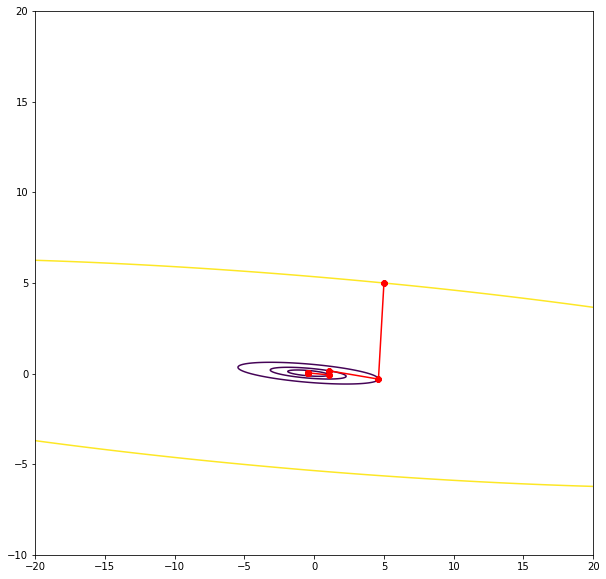

In [ ]:
linear_search_wolfe(function, x, epoch, True,c1=1e-6, c2=1e-6)

### Линейный поиск с условиями Вольфе. c1 = c2 = 1e-4

[-0.42967285  0.0244078 ]


(22, 2076, 1080)

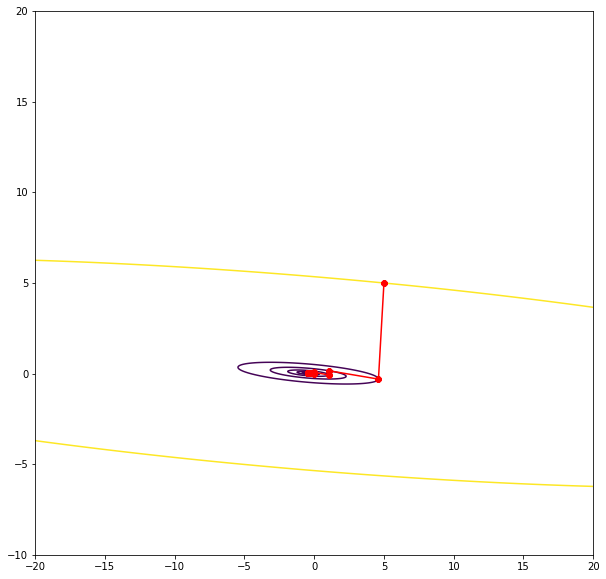

In [ ]:
linear_search_wolfe(function, x, epoch, True,c1=1e-4, c2=1e-4)

### Линейный поиск с условиями Вольфе. c1 = c2 = 1e-3

[-0.42967283  0.0244078 ]


(22, 1814, 950)

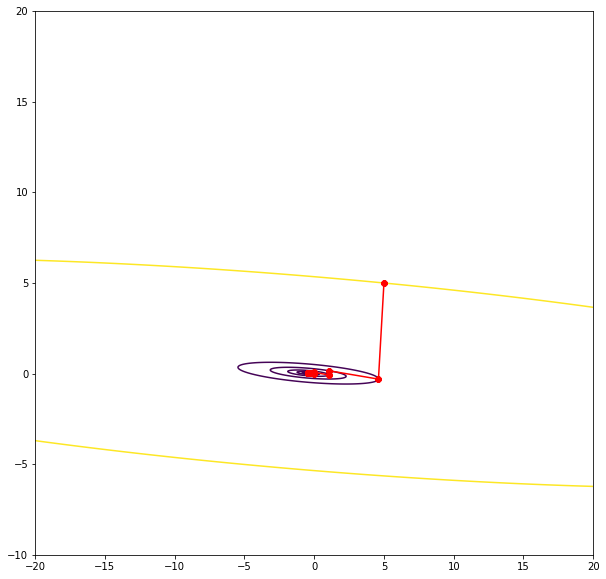

In [ ]:
linear_search_wolfe(function, x, epoch, True, c1=1e-3, c2=1e-3)

### Линейный поиск с условиями Вольфе. c1 = c2 = 1e-2

[-0.42965313  0.02440637]


(306, 23766, 12494)

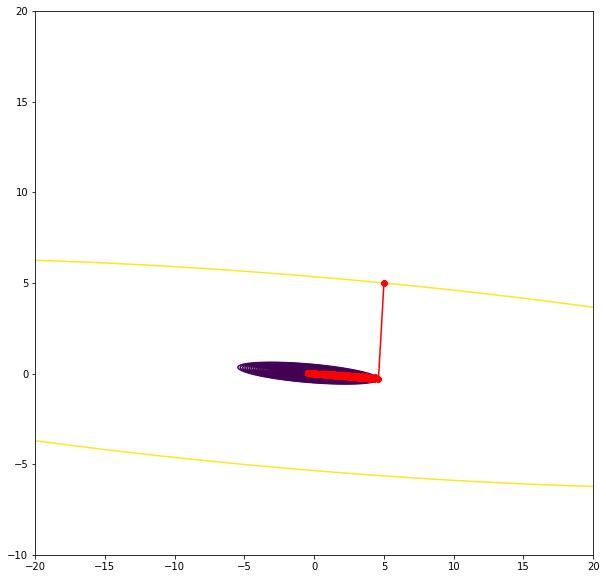

In [ ]:
linear_search_wolfe(function, x, epoch, True,c1=1e-2, c2=1e-2)

# Прочее

### Функция Розенброка


In [ ]:
def rosenbrock(x):
    return (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2

[-3.95968760e+27  1.01165407e+06]


4

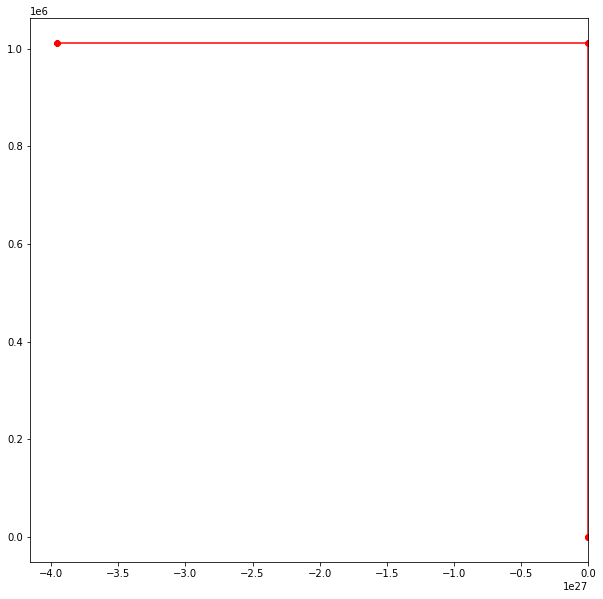

In [ ]:
x = generate_random_point()
const_step(rosenbrock, x, epoch, True)
